**Srinivas Naidu Pasyavula <br>
QC61851**
<br><br>
Dr. Tony Diana <br>
DATA 690 Introduction to NLP <br>
Homework, Week 8<br><br>

In [1]:
# This code mounts your Google Drive to the Colab notebook, changes the directory to a specific folder on your Drive, and lists the contents of that folder using the ls command.

#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'NLP DATA 690 UMBC'/'week8'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/NLP DATA 690 UMBC/week8
'QC61851-Srinivas Naidu Pasyavula-NLP-Week 8- HW.ipynb'   Tweets.csv


# **Exercise - 1**

## 1. Import necessary libraries

In [2]:
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import pandas as pd

## 2. Define the corpus

In [3]:
corpus = [
    'This is good pizza', 'I love Italian pizza', 'The best pizza',
    'nice pizza', 'Excellent pizza', 'I love pizza',
    'The pizza was alright', 'disgusting pineapple pizza',
    'not good pizza', 'bad pizza', 'very bad pizza',
    'I had better pizza'
]

## 3. Create class labels

In [4]:
labels = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

## 4. Create a DataFrame

In [5]:
data = {'text': corpus, 'sentiment': labels}
df = pd.DataFrame(data)

## 5. Extract vocabulary and encode it

In [6]:
vocab_size = 50
encoded_corpus = [one_hot(sentence, vocab_size) for sentence in corpus]

## 6. Pad the documents to the maximum length

In [7]:
max_length = max([len(s.split()) for s in corpus])
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post')

## 7. Define the model

In [8]:
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

## 8. Compile the model

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 9. Train the model

In [10]:
# Convert labels to a NumPy array
labels = np.array(labels)

# Train the model
#model.fit(padded_corpus, labels, epochs=50)
history = model.fit(padded_corpus, labels, epochs=50, validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6967 - accuracy: 0.3333 - val_loss: 0.6828 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 107ms/step - loss: 0.6944 - accuracy: 0.3333 - val_loss: 0.6851 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 64ms/step - loss: 0.6921 - accuracy: 0.3333 - val_loss: 0.6873 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 72ms/step - loss: 0.6897 - accuracy: 0.4444 - val_loss: 0.6895 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 73ms/step - loss: 0.6874 - accuracy: 0.6667 - val_loss: 0.6918 - val_accuracy: 0.6667
Epoch 6/50
1/1 [==============================] - 0s 71ms/step - loss: 0.6851 - accuracy: 0.7778 - val_loss: 0.6940 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 0s 62ms/step - loss: 0.6828 - accuracy: 0.7778 - val_loss: 0.6962 - val_accuracy: 0.3333
Epoch 8/50
1/1 [============

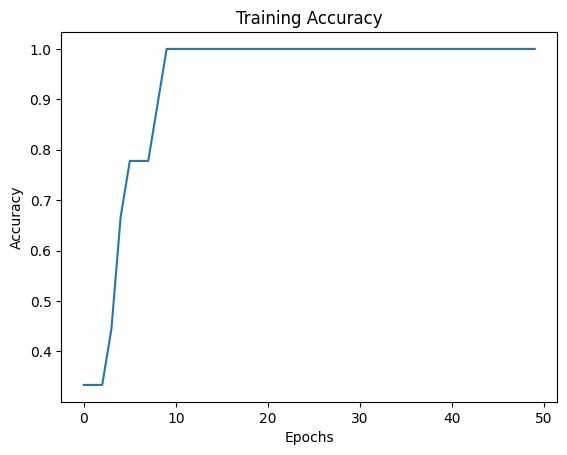

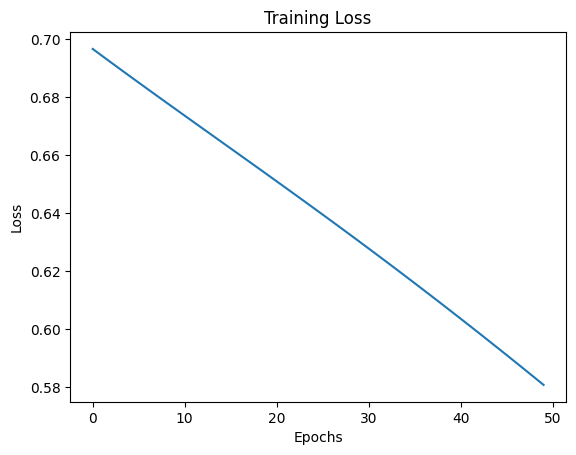

Final training accuracy: 1.0


In [11]:
# Plot the training accuracy and loss
import matplotlib.pyplot as plt

# Retrieve training history
acc = history.history['accuracy']
loss = history.history['loss']

# Plot accuracy
plt.plot(acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Obtain the final accuracy on the training data
final_accuracy = acc[-1]
print(f"Final training accuracy: {final_accuracy}")


---

# **Exercise 2**

In [12]:
# Import necessary libraries
import nltk
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Download NLTK resources if not downloaded already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Load the data from the Tweets.csv file
file_path = 'Tweets.csv'
data = pd.read_csv(file_path)

In [14]:
# Display the first five rows
display(data.head())

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


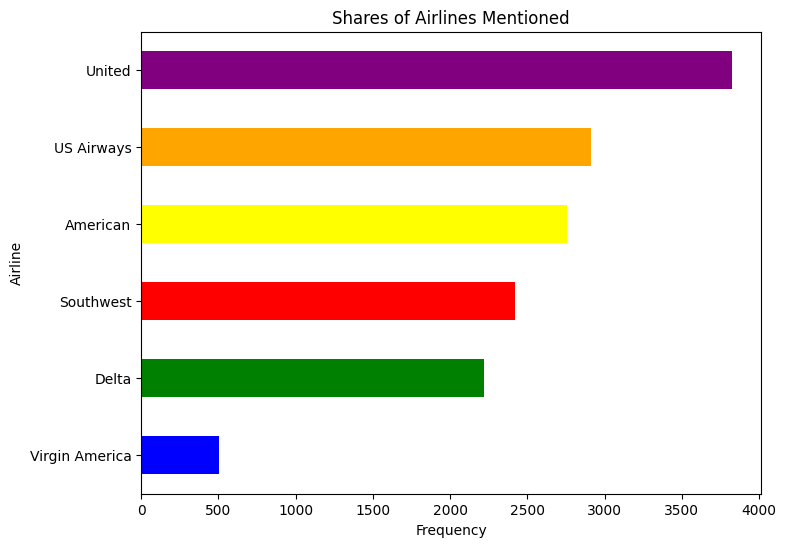

In [15]:
# Plot the shares of airlines mentioned in the data - Horizontal Bar Plot
plt.figure(figsize=(8, 6))
airline_counts = data['airline'].value_counts()
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple']
airline_counts.sort_values().plot(kind='barh', color=colors)
plt.title('Shares of Airlines Mentioned')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.show()


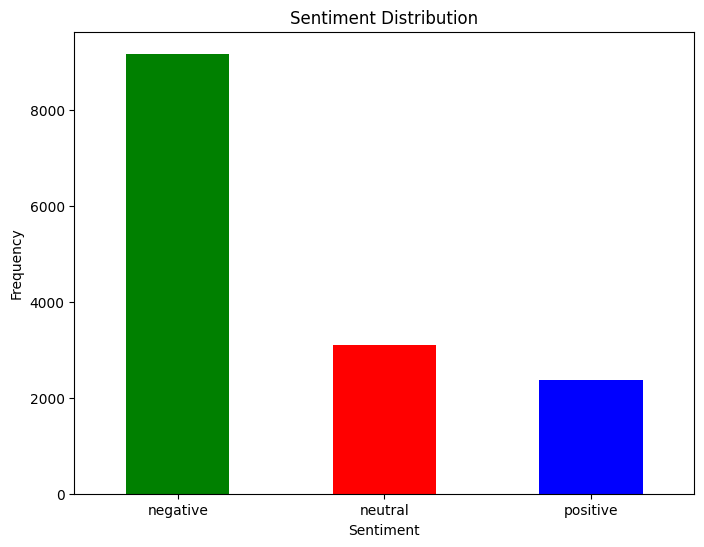

In [16]:
# Plot the percentage of positive, negative, and neutral sentiments - Bar Plot
sentiment_counts = data['airline_sentiment'].value_counts()
colors = ['green', 'red', 'blue']

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # To avoid rotating the x-axis labels
plt.show()


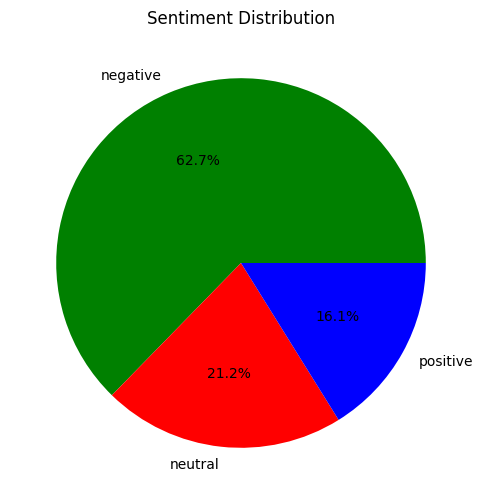

In [17]:
# Plot the percentage of positive, negative, and neutral sentiments - Pie Chart
sentiment_counts = data['airline_sentiment'].value_counts()
colors = ['green', 'red', 'blue']

plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.ylabel('')  # Remove the label on the y-axis
plt.show()


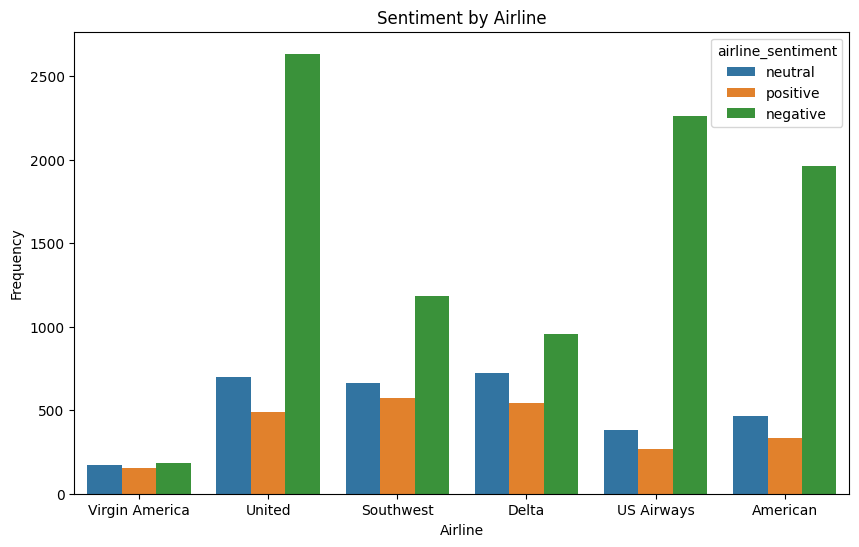

In [18]:
# Show the number of positive, negative, and neutral comments by airline in a bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=data)
plt.title('Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.show()

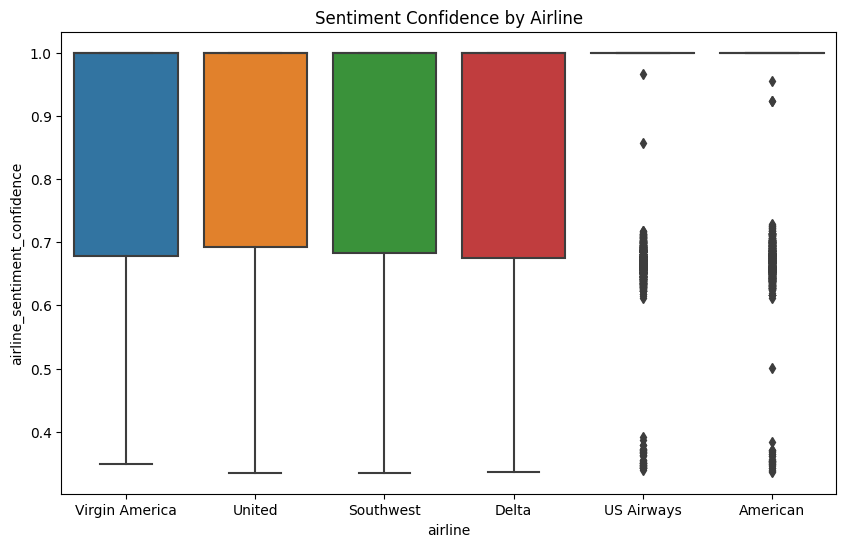

In [19]:
# Show airlines' sentiment confidence using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', data=data)
plt.title('Sentiment Confidence by Airline')
plt.show()

In [20]:
# Define features and labels
features = data['text']
labels = data['airline_sentiment']

# Clean the tweets
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtag symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks

    return text

data['clean_text'] = data['text'].apply(clean_text)

In [21]:
# Vectorize the tweets using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['clean_text'])

In [22]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Instantiate the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [23]:
# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

In [24]:
# Generate and display evaluation metrics
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
 [[1750   96   43]
 [ 268  275   37]
 [ 113   45  301]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.93      0.87      1889
     neutral       0.66      0.47      0.55       580
    positive       0.79      0.66      0.72       459

    accuracy                           0.79      2928
   macro avg       0.76      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928


Accuracy Score: 0.7943989071038251
